### Introduction to Monte Carlo Simulation Analysis


#### MCS_intro.m is the name of the oringal file (MATLAB)

#### This is an introductory example to Monte Carlo Simulation

#### This code is a python adaptation of orginal Matlab code written by  H.P. Gavin, Dept. Civil and Environmental Engineering, Duke Univ, Jan. 2012

https://people.duke.edu/~hpgavin/cee251/ 


In [71]:
'''
Y = g (X1, X2, X3) = sin (X1) + sqrt(X2) - ехр(-Х3) - 2 

where:
X1 is a normal distribution
X2 is a lognormal distribution
X3 is a rayleigh distribution

'''

'\nY = g (X1, X2, X3) = sin (X1) + sqrt(X2) - ехр(-Х3) - 2 \n\nwhere:\nX1 is a normal distribution\nX2 is a lognormal distribution\nX3 is a rayleigh distribution\n\n'

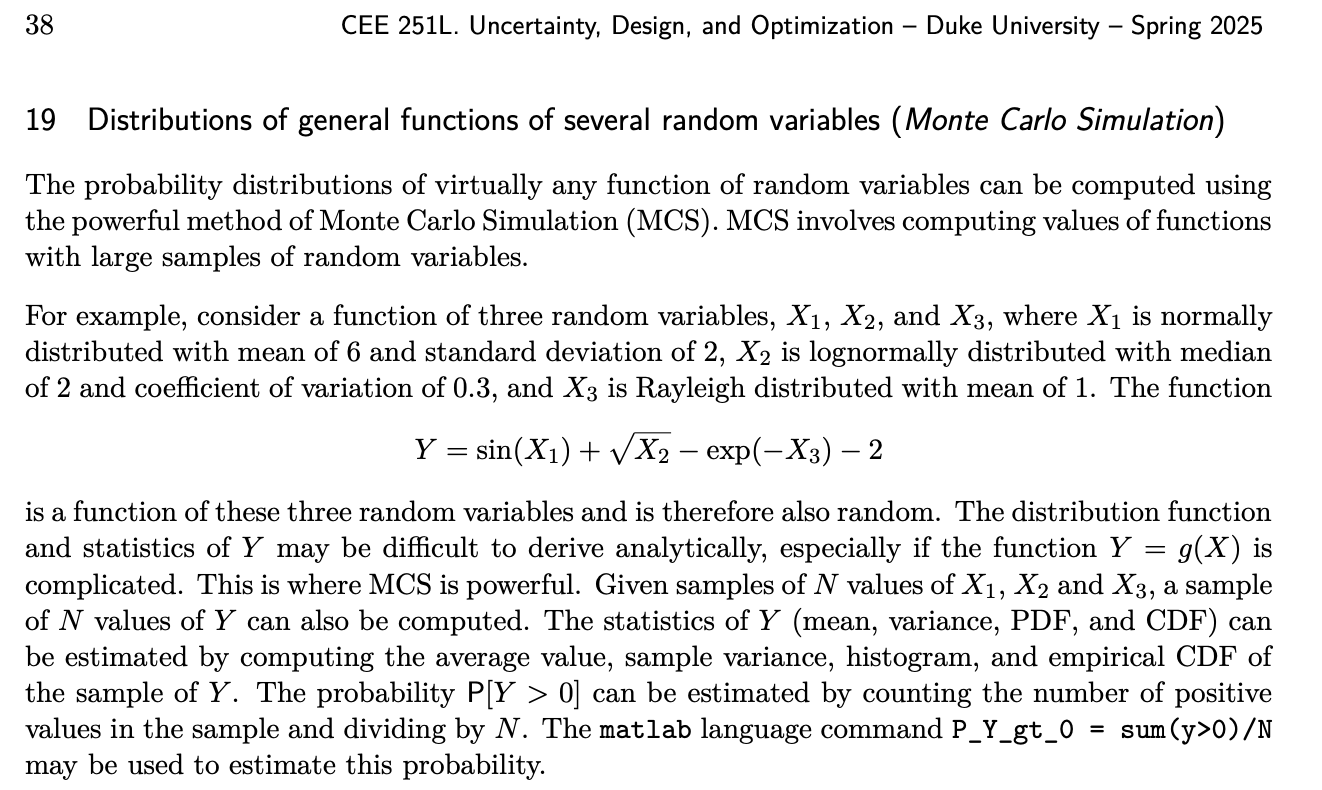

In [72]:
# Monte Carlo Simulation in Python 
# This code is a python adaptation of orginal Matlab code written by H.P. Gavin, Dept. Civil and Environmental
# Engineering, Duke Univ, Jan. 2012 )

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, rayleigh

#### Define Parameters for MC simulation 

In [73]:
# Step 1: Define Parameters – simulations, random variables, function to evaluate

N = 1000  # Number of samples

# Input variable distributions
# X1,  N ~ (mu=6, sigma=2)
mu1, sd1 = 6, 2

# X2, Lognormal w/ median=2 and coefficient of variation 'cv'=0.3
med2, cov2 = 2, 0.3
                                         # convert median and cov to shape (sigma) and scale for scipy
sigma2 = np.sqrt(np.log(1 + cov2**2))    # shape parameter – get std. dev of the underlying normal distribution.
scale2 = med2 / np.exp(0.5 * sigma2**2)  # scale parameter - exp(mu) where mu is mean of unerlying normal distrib.
# see attached formulas below 

# X3: Rayleigh distribution with scale = 1
mu3 = 1


#### Generate Random Samples and Evaluate function Y

In [74]:
# Step 2: Generate Random Samples

np.random.seed(42)  # for reproducibility

X1 = np.random.normal(loc=mu1, scale=sd1, size=N)
X2 = lognorm(s=sigma2, scale=scale2).rvs(size=N)
X3 = rayleigh(scale=mu3).rvs(size=N)


# Step 3: Evaluate the Function Y = sin(X1) + sqrt(X2) - exp(-X3) - 2
Y = np.sin(X1) + np.sqrt(X2) - np.exp(-X3) - 2


#### Estimate Probability of Failure and Compute Empirical CDF Values

Estimated Probability of Failure: 0.1080


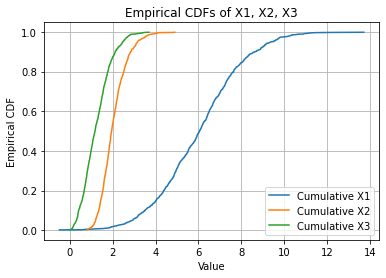

In [75]:
# Step 4: Estimate Probability of Failure (Y > 0)

prob_failure = np.sum(Y > 0) / N
print(f"Estimated Probability of Failure: {prob_failure:.4f}")

# Step 5: Compute Empirical CDF Values
sort_X1 = np.sort(X1)
sort_X2 = np.sort(X2)
sort_X3 = np.sort(X3)
sort_Y = np.sort(Y)
CDF = np.arange(1, N + 1) / (N + 1)


# (4) Plot empirical CDFs (optional)
for X, label in zip([X1, X2, X3], ['X1', 'X2', 'X3']):
    sorted_X = np.sort(X)
    cdf = np.arange(1, N + 1) / (N + 1)
    plt.plot(sorted_X, cdf, label=f'Cumulative {label}')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Empirical CDF')
plt.title('Empirical CDFs of X1, X2, X3')
plt.grid(True)
plt.show()


#### Step 6: Plot Histograms + PDFs and CDFs for X1, X2, X3

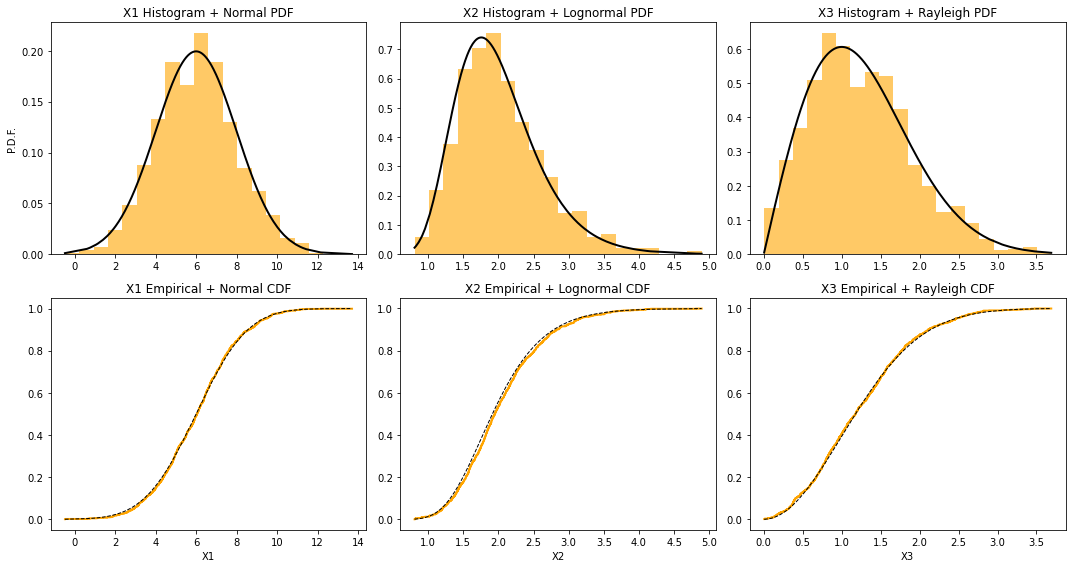

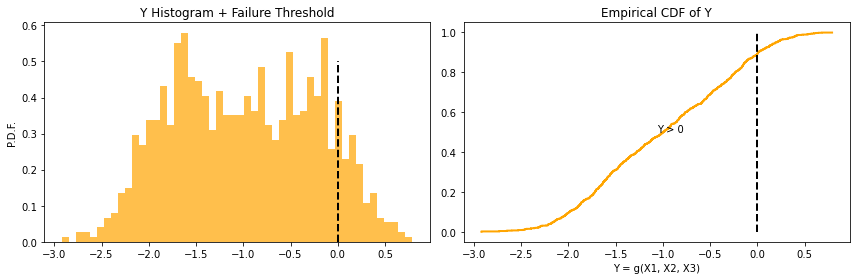

In [76]:
# Step 6: Plot Histograms + PDFs and CDFs for X1, X2, X3

n_bins = int(N / 50)
color = 'orange'  # Simple and readable


fig, axs = plt.subplots(2, 3, figsize=(15, 8)) # 2x3 matrix of subplots
                                                                        #---------------------- X1 plots
# X1 Histogram + PDF
axs[0, 0].hist(X1, bins=n_bins, density=True, color=color, alpha=0.6) 
x_vals = np.sort(X1)
axs[0, 0].plot(x_vals, norm.pdf(x_vals, loc=mu1, scale=sd1), 'k-', linewidth=2)
axs[0, 0].set_title("X1 Histogram + Normal PDF")
axs[0, 0].set_ylabel("P.D.F.")

# X1 CDF
axs[1, 0].step(sort_X1, CDF, color=color, linewidth=2)
axs[1, 0].plot(x_vals, norm.cdf(x_vals, mu1, sd1), 'k--', linewidth=1)
axs[1, 0].set_title("X1 Empirical + Normal CDF")
axs[1, 0].set_xlabel("X1")
                                                                        #---------------------- X2 plots
# X2 Histogram + PDF
axs[0, 1].hist(X2, bins=n_bins, density=True, color=color, alpha=0.6)
x_vals = np.sort(X2)
axs[0, 1].plot(x_vals, lognorm.pdf(x_vals, s=sigma2, scale=scale2), 'k-', linewidth=2)
axs[0, 1].set_title("X2 Histogram + Lognormal PDF")

# X2 CDF
axs[1, 1].step(sort_X2, CDF, color=color, linewidth=2)
axs[1, 1].plot(x_vals, lognorm.cdf(x_vals, s=sigma2, scale=scale2), 'k--', linewidth=1)
axs[1, 1].set_title("X2 Empirical + Lognormal CDF")
axs[1, 1].set_xlabel("X2")
                                                                        #---------------------- X3 Plots
# X3 Histogram + PDF
axs[0, 2].hist(X3, bins=n_bins, density=True, color=color, alpha=0.6)
x_vals = np.sort(X3)
axs[0, 2].plot(x_vals, rayleigh.pdf(x_vals, scale=mu3), 'k-', linewidth=2)
axs[0, 2].set_title("X3 Histogram + Rayleigh PDF")

# X3 CDF
axs[1, 2].step(sort_X3, CDF, color=color, linewidth=2)
axs[1, 2].plot(x_vals, rayleigh.cdf(x_vals, scale=mu3), 'k--', linewidth=1)
axs[1, 2].set_title("X3 Empirical + Rayleigh CDF")
axs[1, 2].set_xlabel("X3")
                                                                        #----------------------
plt.tight_layout()
plt.show()


# Step 7: Plot Histogram and CDF for Y

n_bins_y = int((N / 20))

fig, axs = plt.subplots(1, 2, figsize=(12, 4)) # 1x2 matrix of subplots

# Histogram of Y with threshold marker at Y = 0
axs[0].hist(Y, bins=n_bins_y, density=True, color=color, alpha=0.7)
axs[0].plot([0, 0], [0, 0.5], 'k--', linewidth=2)
axs[0].set_title("Y Histogram + Failure Threshold")
axs[0].set_ylabel("P.D.F.")

# Empirical CDF of Y
axs[1].step(sort_Y, CDF, color=color, linewidth=2)
axs[1].plot([0, 0], [0, 1], 'k--', linewidth=2)
axs[1].text(0.5, 0.5, 'Y > 0', transform=axs[1].transAxes)
axs[1].set_title("Empirical CDF of Y")
axs[1].set_xlabel("Y = g(X1, X2, X3)")

plt.tight_layout()
plt.show()
